# TP : Algorithmes d'Optimisation (Gradient et Newton)

**Durée :** 2h
**Objectif :** Implémenter et comparer des méthodes d'optimisation du premier et second ordre.

---

## Introduction

On considère le problème de minimisation suivant :
$$
\tag{P}\min_{x \in \mathbb{R}^d} f(x)
$$
où $f : \mathbb{R}^d\to \mathbb{R}$ est une fonction différentiable.

Nous utiliserons la **méthode de descente de gradient** (pas constant) :
$$
x_{k+1} = x_k -\gamma\nabla f(x_k),
$$
où $\gamma$ est le pas et $x_0$ le point initial. La convergence est garantie si $0<\gamma < 2/L$, où 
$L$ est la constante de Lipschitz du gradient. 
En particulier, si $f\in C^{2}$ on a $L = \sup_{x}\Vert \nabla^2 f(x)\Vert$ avec $\nabla^2 f(x)\in\mathcal{M}_{d,d}$ est la Hessienne de $f$ en $x$ et $\Vert\cdot\Vert$ est la norme spéctrale définie par $\Vert A\Vert = \sqrt{\lambda_{\max}(A^TA)}$.

---

## Exercice 1 : Le cas quadratique (warm-up)

On considère la fonction quadratique :
$$
f(x, y) = \frac{1}{2}(a x^2 +b y^2)
$$

**Q1.** Définir les oracles Python `f_quad(x)` et `grad_f_quad(x)`, i.e., des fonctions Python qui renvoient la valeur de $f$, est son gradient $\nabla f$. 

**Q2.** Implémenter une fonction  : `gradient_descent(f, grad_f, x0, gamma, epsilon, max_iter=10000)`.
* **Arrêt :** Si $\|\nabla f(x_k)\| \le \epsilon$.
* **Sorties :** Le point final `x_min` et un tableau `history` des itérés.

**Q3.** Tester l'algorithme avec $x_0 = (2, 5)$, $a = 1, b = 8$ et $\gamma = 0.1$. Tracer la valeur du coût $f(x_k)$ en fonction de $k$ et les itérés $x_k$ superposés aux courbes de niveau de `f`.

**Q4.** **Analyse.** Dans l'objectif d'observer l’effet du pas, du point initial et du conditionnement, reprendre les questions précédentes en faisant varier: i) les valeurs du pas $\gamma$, ii) plusieurs points initiaux $x_0$, iii) différents couples $(a, b)$.

---


## Exercice 2 : La fonction de Rosenbrock (Problème non-convexe)

On considère la fonction de Rosenbrock qui admet un minimum global en $(1,1)$ :
$$
g(x,y) = 100(y-x^2)^2 + (1-x)^2.
$$

Pour gagner du temps, son gradient est :
$$
\nabla g(x, y) = \begin{pmatrix} -400x(y-x^2) - 2(1-x) \\ 200(y-x^2) \end{pmatrix}
$$

**Q1.** Implémenter les oracles `f_rosen(x)` et `grad_f_rosen(x)`.

**Q2.** Tester `gradient_descent` sur $g$ en partant de $x_0 = (2, 5)$ avec un petit pas (eg: $\gamma = 0.002$).

**Q3.** **Recherche Linéaire avec rebroussement (Backtracking).** Implémenter `gradient_descent_backtracking`.
* **Condition :** Tant que le pas $\gamma$ ne satisfait pas :
    $$f(x_k - \gamma \nabla f(x_k)) \le f(x_k) - \alpha \gamma \|\nabla f(x_k)\|^2$$
    on réduit $\gamma \leftarrow \beta \gamma$.
* Utiliser $\gamma = 2,\alpha=0.25$ et $\beta=0.5$.

---

## Exercice 3 : Méthode de Newton

La méthode de Newton est définie par :
$$
x_{k+1} = x_k - [\nabla^{2}f(x_k)]^{-1}\nabla f(x_k).
$$

La matrice Hessienne de la fonction de Rosenbrock (pour l'oracle `hess_f_rosen`) est:
$$
\nabla^2 g(x, y) = \begin{pmatrix} 1200x^2 - 400y + 2 & -400x \\ -400x & 200 \end{pmatrix}.
$$

**Q1.** Implémenter la fonction `newton_method(f, grad_f, hess_f, x0, epsilon, max_iter)`.

**Q2.** Comparer la vitesse de convergence des trois méthodes implémentées (Newton, Gradient à pas constant et le Gradient avec Backtracking) en utilisant les fonctions $f$ et $g$.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Exercice 1



### Question1

In [2]:
a=1
b=8
def f_quad(x):
    return 0.5*(a*x[0]**2 + b*x[1]**2)
def grad_f_quad(x):
    return (a*x[0] , b*x[1])
def norme(x):
    return (x[0]**2 + x[1]**2)**0.5
    

### Question 2 

In [3]:
def gradient_descent(f, grad_f, x0, gamma, epsilon, max_iter=10000) :
    history = [x0]
    i=0
    while norme(grad_f(x0)) > epsilon and i < max_iter:
        grad = grad_f(x0)  
        x0[0] = x0[0] - gamma * grad[0]
        x0[1] = x0[1] - gamma * grad[1]
        history.append(x0.copy())
        # print(x0)  pour des test futur
        # print(grad)
        i= i+1
    if i >= max_iter:
        print("Pas de convergence .(Pensez a changer gamma)")
    if norme(grad_f(x0)) <= epsilon:
        print(f"minimum trouver apres {i} iterations")
        
    return history
    
        


### Question 3 

minimum trouver apres 116 iterations


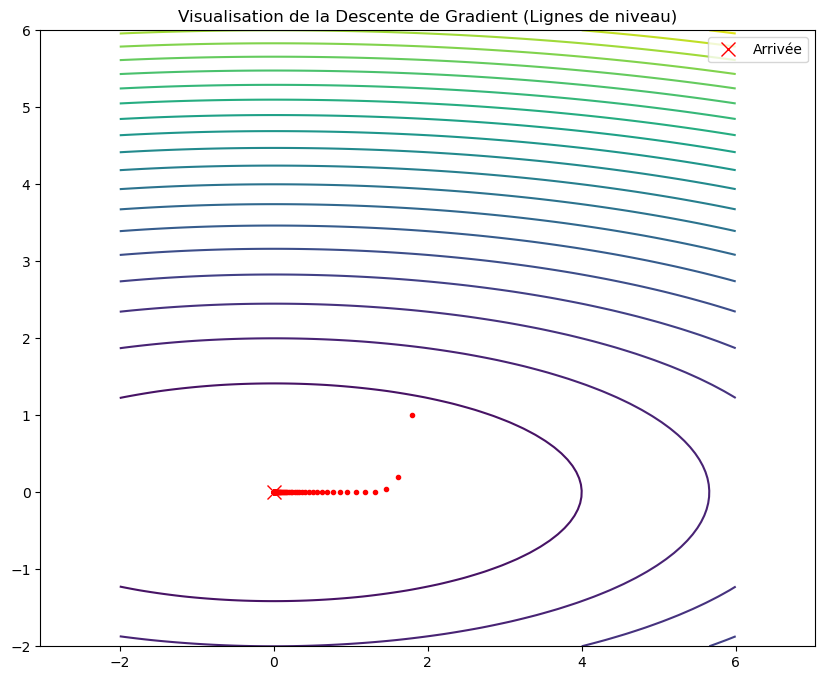

In [4]:
def plot_resultat(f, grad_f,point_ini,couple,gamma):
    history = gradient_descent(f, grad_f, point_ini, gamma, 0.00001)
    path_x = [point[0] for point in history]
    path_y = [point[1] for point in history]
    
    # Détermination des limites de la grille Pour que tous les points apparaissent dans le graph
    x_min = min(min(path_x) - 1, -2)
    x_max = max(max(path_x) + 1, 6)
    y_min = min(min(path_y) - 1, -2)
    y_max = max(max(path_y) + 1, 6)
    
    # Création de la grille pour les lignes de niveau
    n_points = 100
    x_grid = [x_min + i * (x_max - x_min) / (n_points - 1) for i in range(n_points)]
    y_grid = [y_min + i * (y_max - y_min) / (n_points - 1) for i in range(n_points)]
    
    X = [[x for x in x_grid] for _ in range(n_points)]
    Y = [[y_grid[i] for _ in range(n_points)] for i in range(n_points)]
    Z = [[f([X[i][j], Y[i][j]]) for j in range(n_points)] for i in range(n_points)]
    
    plt.figure(figsize=(10, 8))
    
    # Tracer les lignes de niveau (Contours)
    cp = plt.contour(X, Y, Z, levels=20)
    
    
    # Tracer le chemin de la descente
   
    plt.plot(path_x, path_y, 'r.', markersize=6)
    
    # Marquer le départ et l'arrivée
    plt.plot(path_x[-1], path_y[-1], 'rx', label='Arrivée', 
             markersize=10)
    
    plt.title("Visualisation de la Descente de Gradient (Lignes de niveau)")
    plt.legend()

    plt.axis('equal')
    plt.show()
plot_resultat(f_quad,grad_f_quad,[2,5],[1,8],.1)

### Question4
varier:   
I) les valeurs du pas      
II) plusieurs points initiaux    
III) différents couples .   

# Variation du pas Gamma

Pour gamma = 1e-05
Pas de convergence .(Pensez a changer gamma)


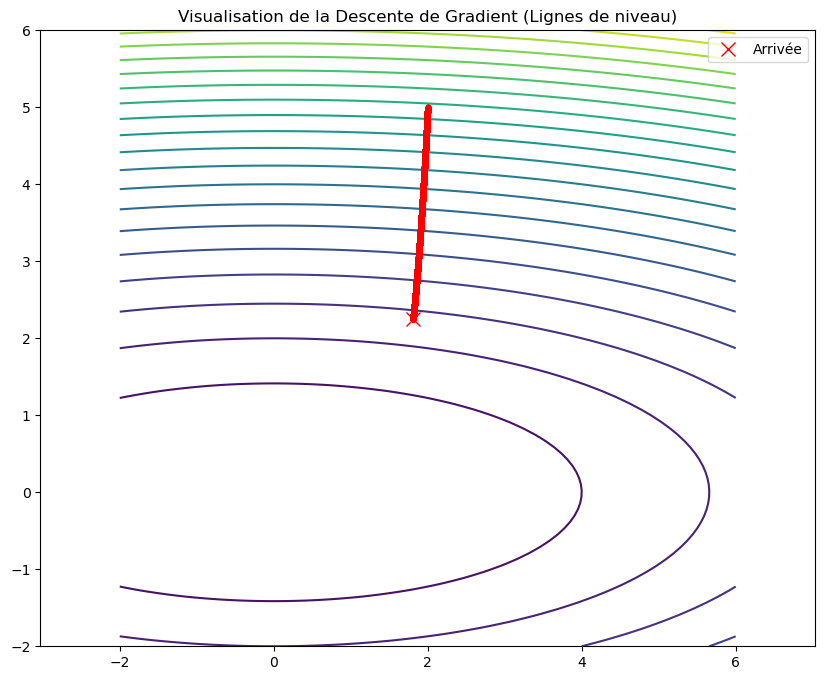

Pour gamma = 0.001
Pas de convergence .(Pensez a changer gamma)


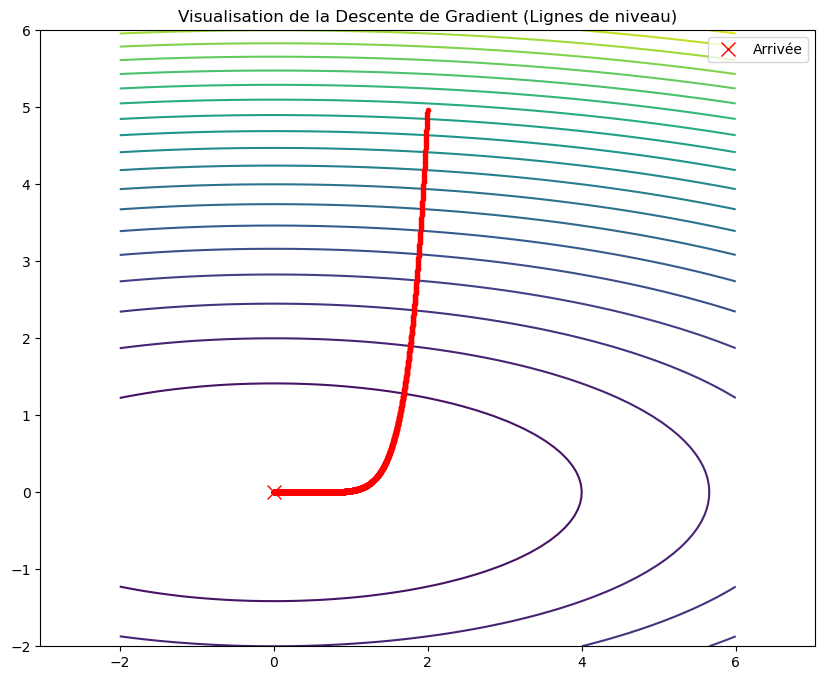

Pour gamma = 0.01
minimum trouver apres 1215 iterations


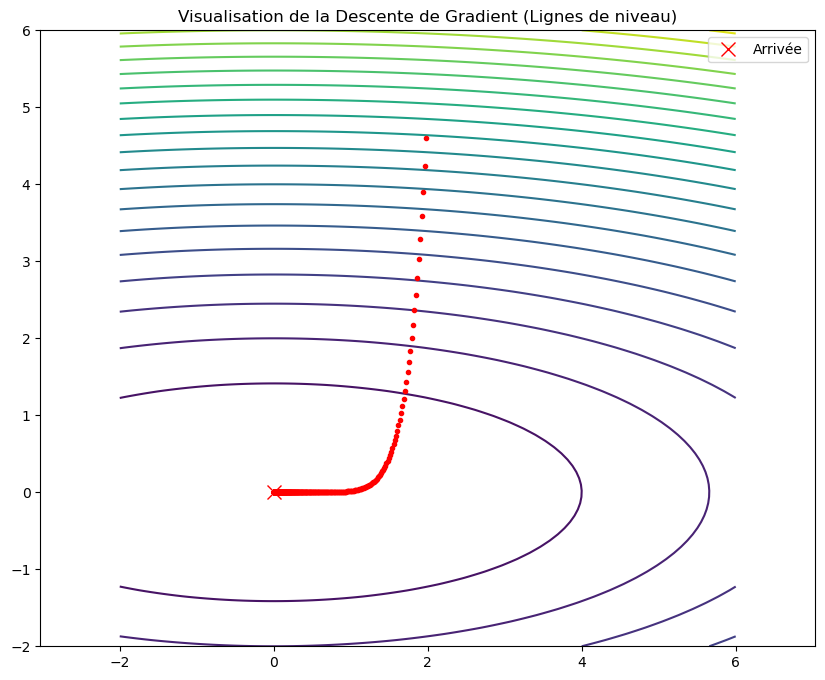

In [5]:
couples = [[1,1],[3,12],[4,8]]
gammas = [0.00001,0.001,0.01]
points_initiaux = [[1,1],[24,0],[-3,-14]]
for gamma in gammas :
    print(f"Pour gamma = {gamma}")
    plot_resultat(f_quad,grad_f_quad,[2,5],[1,8],gamma)



## La vitesse de convergence depend de gamma
On a pour gamma tres petit ou tres grand une divergence 
et une convergence pour gamma au alentours de  $\frac{\lambda_{max} + \lambda_{min}}{2}$ 

# Variation des points initiaux

Pour point initial = [1, 1]
minimum trouver apres 1146 iterations


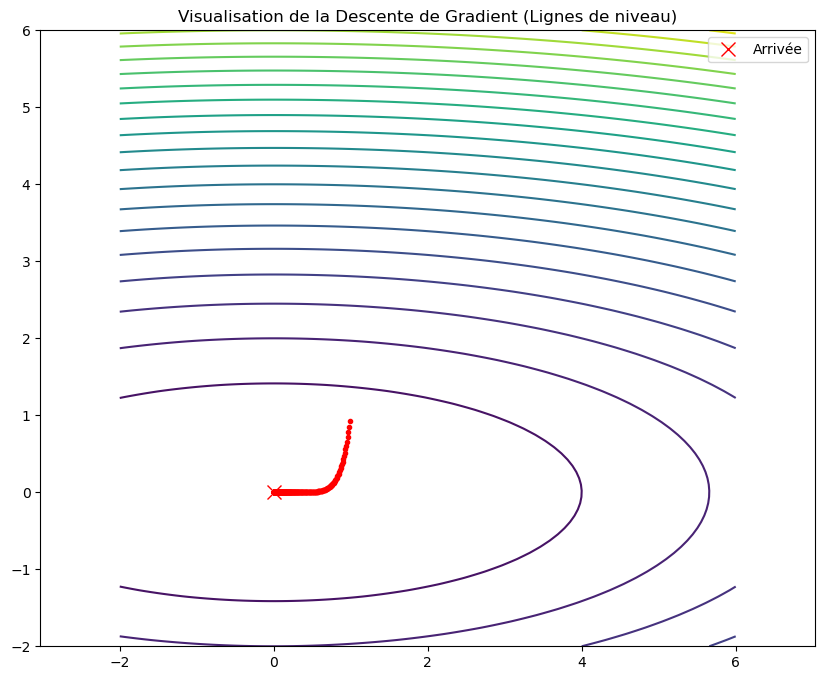

Pour point initial = [24, 0]
minimum trouver apres 1462 iterations


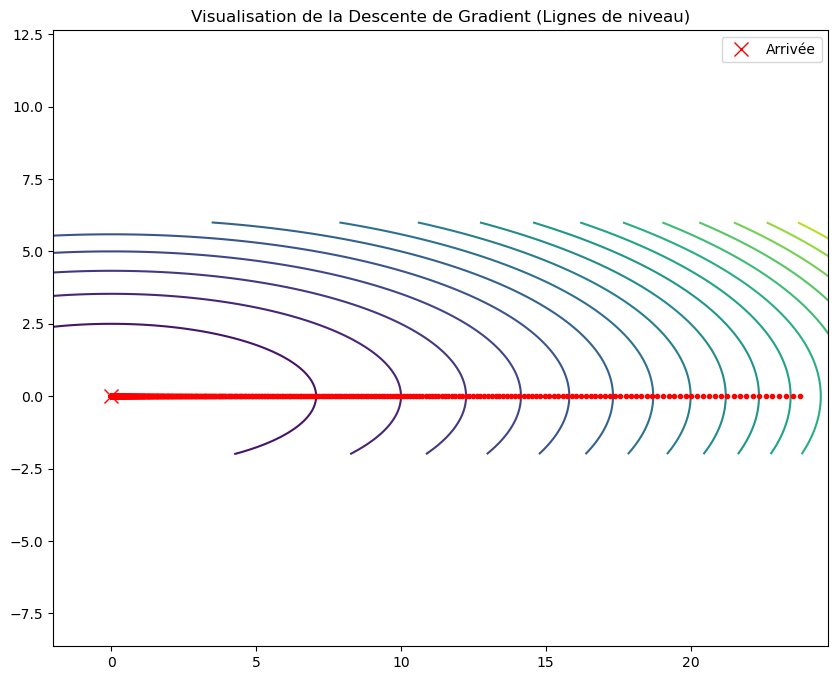

Pour point initial = [-3, -14]
minimum trouver apres 1255 iterations


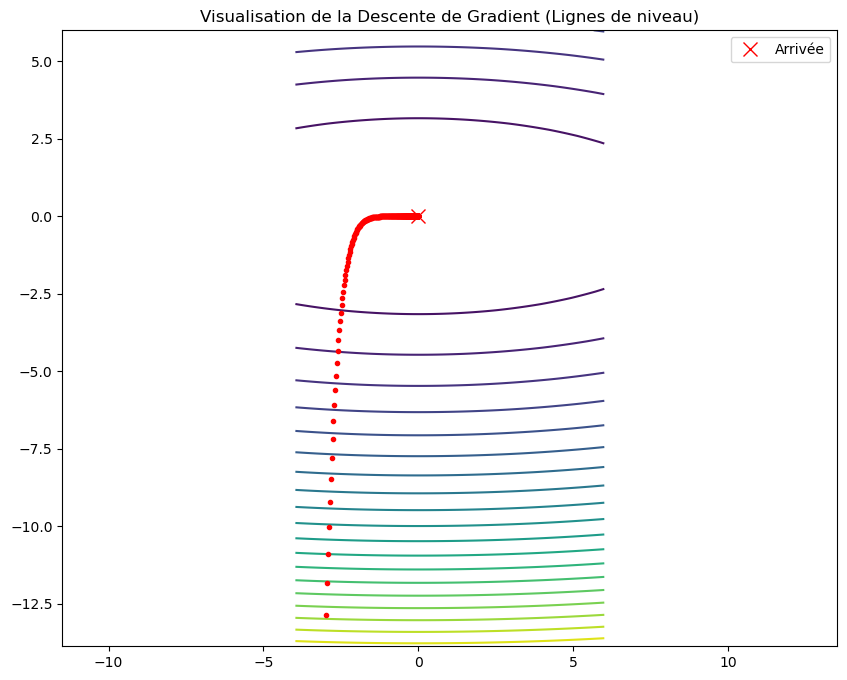

In [6]:
for point in points_initiaux :
    print(f"Pour point initial = {point}")
    plot_resultat(f_quad,grad_f_quad,point,[1,8],0.01)

## La vitesse de convergence ne depend pas des point initiaux 

# Varaiation des couples a b

minimum trouver apres 1314 iterations


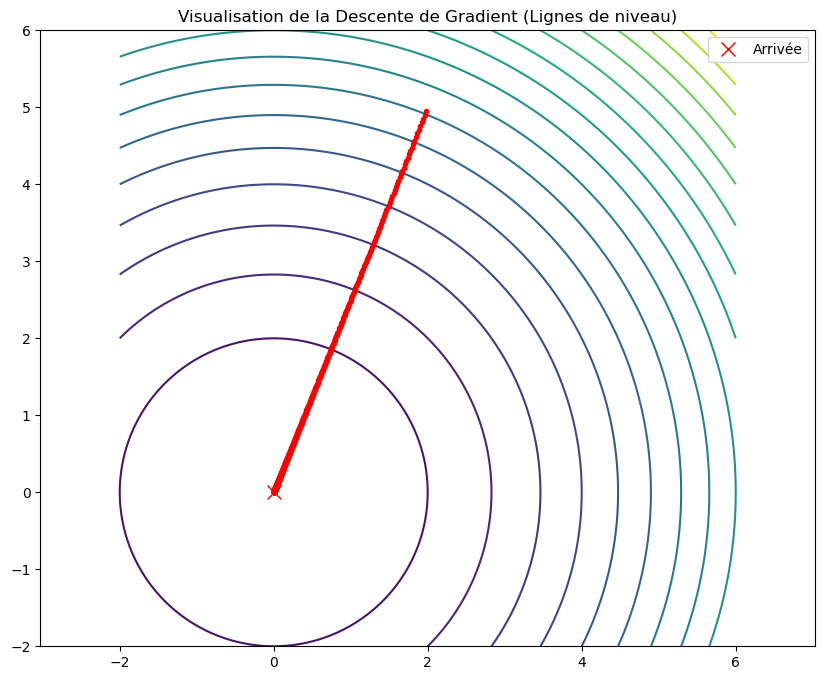

minimum trouver apres 437 iterations


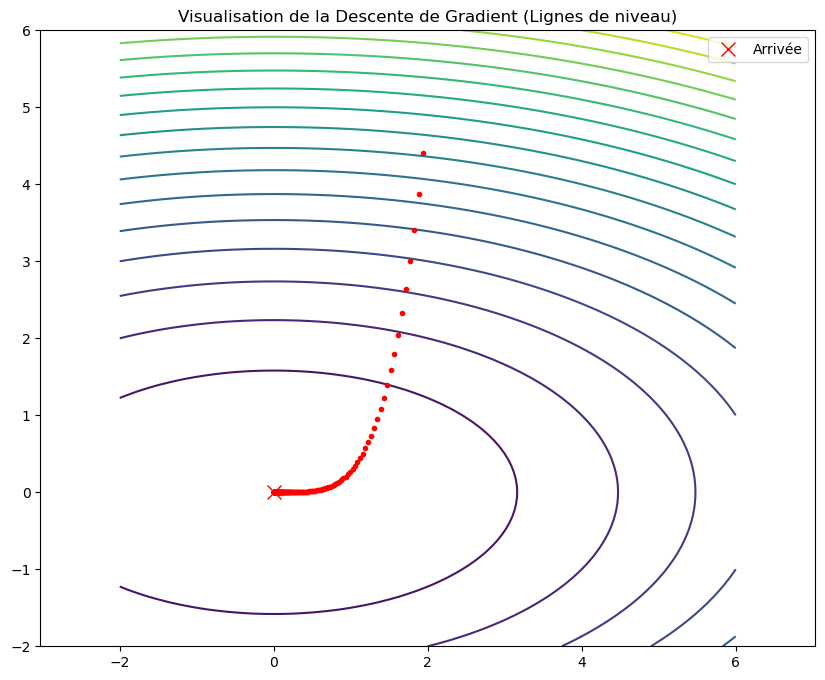

minimum trouver apres 333 iterations


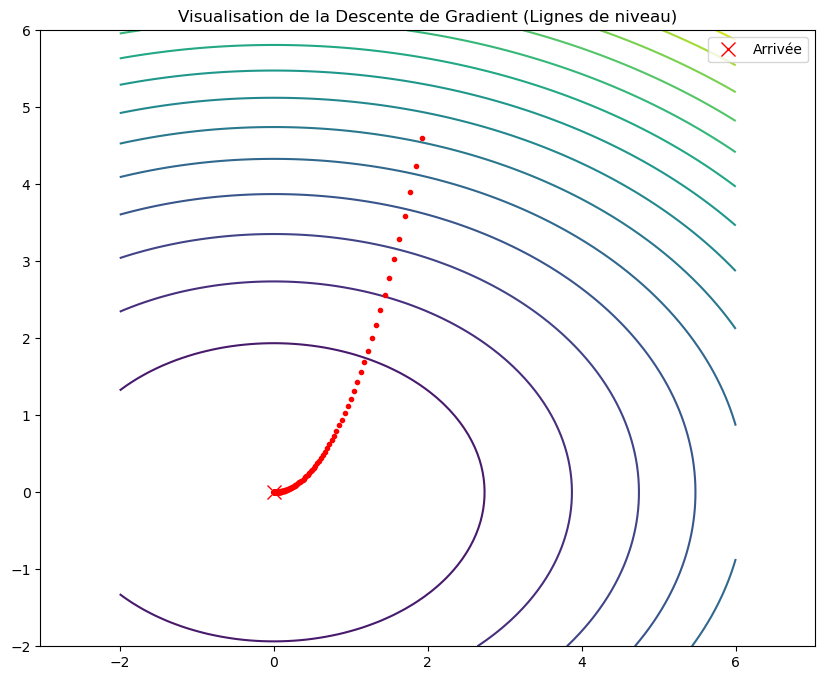

In [7]:
for couple in couples  : #= [[1,1],[3,12],[4,8]]
    a,b = couple
    def f_quad(x):
        return 0.5*(a*x[0]**2 + b*x[1]**2)
    plot_resultat(f_quad,grad_f_quad,[2,5],[1,8],gamma)

## La vitesse de convergence depend du couple a , b definissant la fonction f 
ce qui est evidant car les valeur propre de celle ci dependent de a,b donc par le choix de gamma precedement 

# Exercice 2 
### question1

In [8]:
def f_rosen(x):
    x, y = x[0], x[1]
    return 100*(y-x**2)**2 + (1-x)**2

def grad_f_rosen(x):
    x, y = x[0], x[1]
    return [-400*x*(y-x**2) - 2*(1-x),200*(y-x**2)]


In [9]:
try:
    xrosen, hist_rosen = gradient_descent(f_rosen, grad_f_rosen, [2,5], 0.002, 1e-2)
    print(xrosen)
except:
    print("Erreur Buffer OverFlow")


Erreur Buffer OverFlow


# Erreur Buffer Overflow . 
On a depasser la taille maximale des int qui est de $2^{31}$

In [12]:
def gradient_descent_backtracking(f, grad_f, x0, gamma, alpha, beta, epsilon):
    max_iter  = 10000
    x, y = x0[0], x0[1]
    history  =[(x, y, gamma)]

    for k in range(max_iter):
        gx, gy = grad_f((x,y))
        norm = gx**2 + gy**2

        if norm**0.5 < epsilon :
            break

        while f_rosen((x - gamma*gx, y- gamma*gy)) > f_rosen((x,y)) -alpha * gamma * norm :
            gamma = gamma*beta

        x = x - gamma * gx
        y = y - gamma * gy
        history.append((x, y, gamma))

    return history

le minimum trouve au point de coordonnees :  (1.9355896867168596, 3.7487731108203177)  gamma final :  0.000244140625


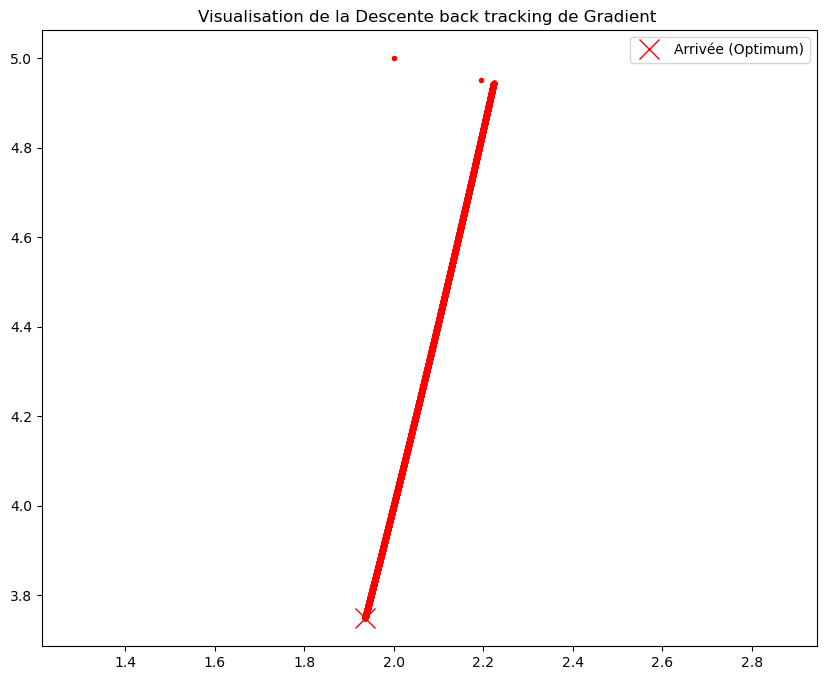

In [13]:
history= gradient_descent_backtracking(f_rosen, grad_f_rosen, [2,5],2, 0.25,0.5, 1e-6)

print("le minimum trouve au point de coordonnees : ",history[-1][0:2], " gamma final : ",history[-1][2] )

path_x = [point[0] for point in history]
path_y = [point[1] for point in history]

# Détermination des limites de la grille
x_min = min(min(path_x) - 1, -2)
x_max = max(max(path_x) + 1, 6)
y_min = min(min(path_y) - 1, -2)
y_max = max(max(path_y) + 1, 6)

# Création de la grille pour les lignes de niveau
n_points = 100
x_grid = [x_min + i * (x_max - x_min) / (n_points - 1) for i in range(n_points)]
y_grid = [y_min + i * (y_max - y_min) / (n_points - 1) for i in range(n_points)]

# Création de X, Y et Z pour les contours
X = [[x for x in x_grid] for _ in range(n_points)]
Y = [[y_grid[i] for _ in range(n_points)] for i in range(n_points)]
Z = [[f_rosen([X[i][j], Y[i][j]]) for j in range(n_points)] for i in range(n_points)]

# Affichage
plt.figure(figsize=(10, 8))

# Tracer le chemin de la descente
plt.plot(path_x, path_y, 'r.', markersize=6)

# Marquer le départ et l'arrivée
plt.plot(path_x[-1], path_y[-1], 'rx', label='Arrivée (Optimum)', 
         markersize=14)

plt.title("Visualisation de la Descente back tracking de Gradient ")

plt.legend()
plt.axis('equal')
plt.show()

# Exercice3

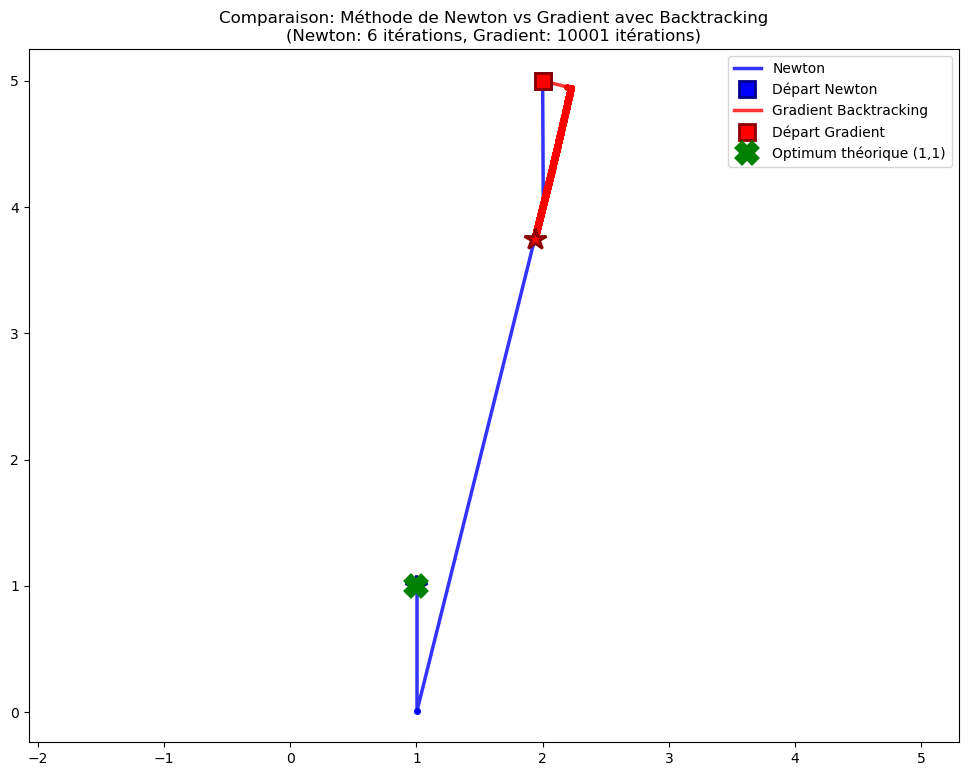

In [14]:
def hess_f_rosen(x):
    x, y = x[0], x[1]
    return np.array([[1200*x**2 - 400*y + 2, -400*x], [-400*x, 200]])

def newton_method(f, grad_f, hess_f, x0, epsilon, max_iter = 10000):
    x, y = x0[0], x0[1]
    history = [(x, y)]
    for _ in range(max_iter):
        gx, gy = grad_f((x,y))
        hess_inv = np.linalg.inv(hess_f((x,y)))
        norm = (gx**2 + gy**2)**0.5
        
        if norm < epsilon:
            break

        (x, y) = (x, y)  - hess_inv @ grad_f((x, y))
        history.append((x,y))

    return history
    
histnewton = newton_method(f_rosen,grad_f_rosen,hess_f_rosen,[2,5],1e-5, 10000)
hist = gradient_descent_backtracking(f_rosen, grad_f_rosen, [2,5], 2, 0.25, 0.5, 1e-5)

newton_x = [point[0] for point in histnewton]
newton_y = [point[1] for point in histnewton]

# Extraction des coordonnées pour la descente de gradient
grad_x = [point[0] for point in hist]
grad_y = [point[1] for point in hist]

# Détermination des limites de la grille 
all_x = newton_x + grad_x
all_y = newton_y + grad_y

x_min = min(all_x) - 0.5
x_max = max(all_x) + 0.5
y_min = min(all_y) - 0.5
y_max = max(all_y) + 0.5

# Création de la grille pour les lignes de niveau
n_points = 200
x_grid = [x_min + i * (x_max - x_min) / (n_points - 1) for i in range(n_points)]
y_grid = [y_min + i * (y_max - y_min) / (n_points - 1) for i in range(n_points)]

# Création de X, Y et Z pour les contours 
X = [[x for x in x_grid] for _ in range(n_points)]
Y = [[y_grid[i] for _ in range(n_points)] for i in range(n_points)]
Z = [[f_rosen([X[i][j], Y[i][j]]) for j in range(n_points)] for i in range(n_points)]

# Affichage
plt.figure(figsize=(12, 9))

# Trajectoire Newton (BLEU)
plt.plot(newton_x, newton_y, 'b-', label='Newton', linewidth=2.5, alpha=0.8)
plt.plot(newton_x, newton_y, 'b.', markersize=8)
plt.plot(newton_x[0], newton_y[0], 'bs', markersize=12, 
         markeredgecolor='darkblue', markeredgewidth=2, label='Départ Newton')
plt.plot(newton_x[-1], newton_y[-1], 'b*', markersize=16, 
         markeredgecolor='darkblue', markeredgewidth=2)



# Trajectoire Gradient avec Backtracking (ROUGE)
plt.plot(grad_x, grad_y, 'r-', label='Gradient Backtracking', linewidth=2.5, alpha=0.8)
plt.plot(grad_x, grad_y, 'r.', markersize=8)
plt.plot(grad_x[0], grad_y[0], 'rs', markersize=12, markeredgecolor='darkred', markeredgewidth=2, label='Départ Gradient')
plt.plot(grad_x[-1], grad_y[-1], 'r*', markersize=16, markeredgecolor='darkred', markeredgewidth=2)

plt.plot(1, 1, 'gX', markersize=14, markeredgewidth=3, 
         label='Optimum théorique (1,1)')

plt.title("Comparaison: Méthode de Newton vs Gradient avec Backtracking\n" + 
          f"(Newton: {len(histnewton)} itérations, Gradient: {len(hist)} itérations)")

plt.legend()
plt.axis('equal')


plt.show()


# Comparaison: Méthode de Newton vs Gradient avec Backtracking
 On remarque que la methode de Newton converge 2000 fois plus rapidement que la methode de grad avec backtracking

minimum trouver apres 333 iterations


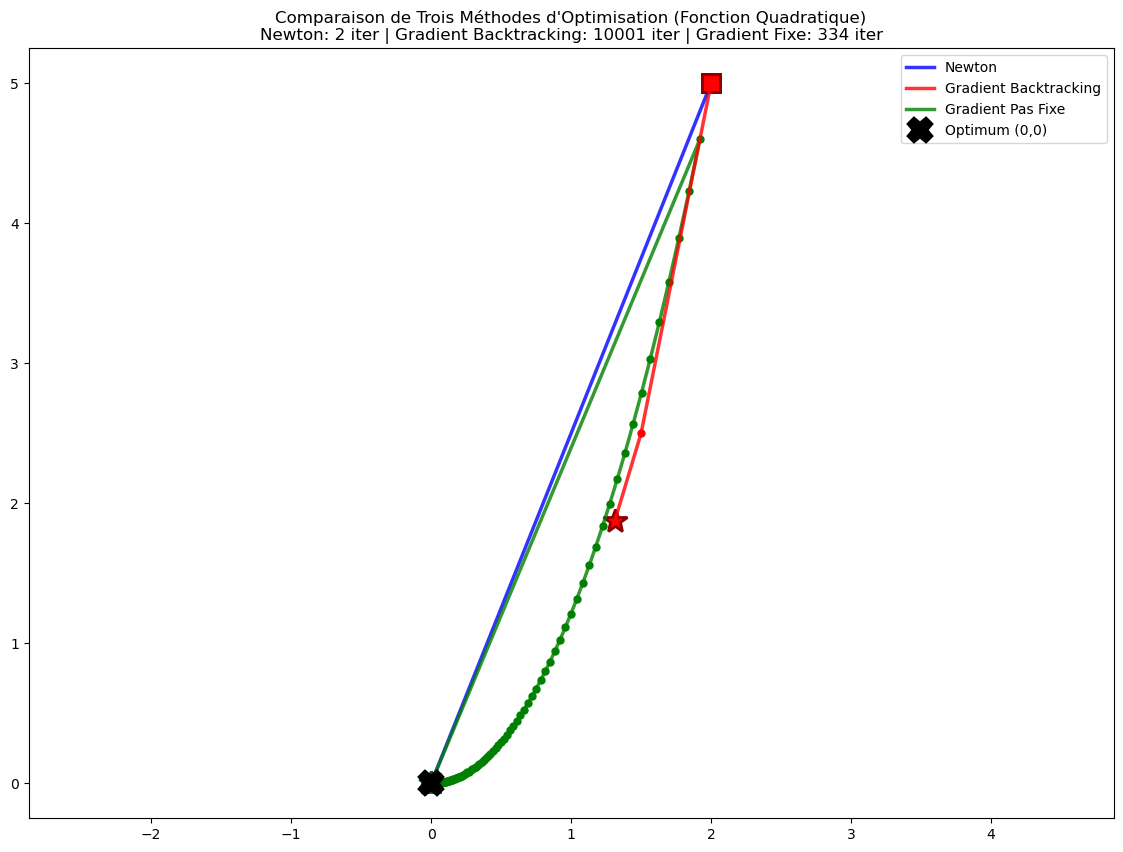

In [15]:
def hess_f_quad(x):
    return [[a,0],[0,b]]
    
histnewton = newton_method(f_quad,grad_f_quad,hess_f_quad,[2,5],1e-5, 10000)
hist = gradient_descent_backtracking(f_quad, grad_f_quad, [2,5], 2, 0.25, 0.5, 1e-5)
hist_gradient = gradient_descent(f_quad,grad_f_quad,[2,5],0.01,1e-5)


newton_x = [point[0] for point in histnewton]
newton_y = [point[1] for point in histnewton]

# Extraction des coordonnées pour Gradient Backtracking
backtrack_x = [point[0] for point in hist]
backtrack_y = [point[1] for point in hist]

# Extraction des coordonnées pour Gradient à pas fixe
gradient_x = [point[0] for point in hist_gradient]
gradient_y = [point[1] for point in hist_gradient]

# Détermination des limites de la grille 
all_x = newton_x + backtrack_x + gradient_x
all_y = newton_y + backtrack_y + gradient_y

x_min = min(all_x) - 0.5
x_max = max(all_x) + 0.5
y_min = min(all_y) - 0.5
y_max = max(all_y) + 0.5

# Création de la grille pour les lignes de niveau
n_points = 200
x_grid = [x_min + i * (x_max - x_min) / (n_points - 1) for i in range(n_points)]
y_grid = [y_min + i * (y_max - y_min) / (n_points - 1) for i in range(n_points)]

# Création de X, Y et Z pour les contours 
X = [[x for x in x_grid] for _ in range(n_points)]
Y = [[y_grid[i] for _ in range(n_points)] for i in range(n_points)]
Z = [[f_quad([X[i][j], Y[i][j]]) for j in range(n_points)] for i in range(n_points)]

# Affichage
plt.figure(figsize=(14, 10))

# Trajectoire Newton (BLEU)
plt.plot(newton_x, newton_y, 'b-', label='Newton', linewidth=2.5, alpha=0.8)
plt.plot(newton_x, newton_y, 'b.', markersize=10)
plt.plot(newton_x[0], newton_y[0], 'bs', markersize=13, markeredgecolor='darkblue', markeredgewidth=2)
plt.plot(newton_x[-1], newton_y[-1], 'b*', markersize=18, markeredgecolor='darkblue', markeredgewidth=2)

# Trajectoire Gradient avec Backtracking (ROUGE)
plt.plot(backtrack_x, backtrack_y, 'r-', label='Gradient Backtracking', 
         linewidth=2.5, alpha=0.8, zorder=3)
plt.plot(backtrack_x, backtrack_y, 'r.', markersize=10, )
plt.plot(backtrack_x[0], backtrack_y[0], 'rs', markersize=13, 
         markeredgecolor='darkred', markeredgewidth=2 )
plt.plot(backtrack_x[-1], backtrack_y[-1], 'r*', markersize=18, 
         markeredgecolor='darkred', markeredgewidth=2 )

# Trajectoire Gradient à pas fixe (VERT)
plt.plot(gradient_x, gradient_y, 'g-', label='Gradient Pas Fixe', 
         linewidth=2.5, alpha=0.8)
plt.plot(gradient_x, gradient_y, 'g.', markersize=10)
plt.plot(gradient_x[0], gradient_y[0], 'gs', markersize=13, 
         markeredgecolor='darkgreen', markeredgewidth=2)
plt.plot(gradient_x[-1], gradient_y[-1], 'g*', markersize=18, 
         markeredgecolor='darkgreen', markeredgewidth=2)

# Marquer l'optimum
plt.plot(0, 0, 'kX', markersize=16, markeredgewidth=3, 
         label='Optimum (0,0)')

plt.title(f"Comparaison de Trois Méthodes d'Optimisation (Fonction Quadratique)\n" + 
          f"Newton: {len(histnewton)} iter | " +
          f"Gradient Backtracking: {len(hist)} iter | " +
          f"Gradient Fixe: {len(hist_gradient)} iter")
plt.legend()
plt.axis('equal')

# Afficher quelques statistiques


plt.show()

# Comparaison: Méthode de Newton vs Gradient avec Backtracking vs Gradient a pas constant
 On remarque que la methode de Newton converge 2000 fois plus rapidement que la methode de grad avec backtracking et 600 fois plus rapidement que le gradients a pas constant .       
 le gradient a pas constant converge 9 fois plus rapidement que le gradient avec back tracking ce qui nous ramene a la conclusion suivante :    
 ### La methode de Newton est la plus rapide mais avec grand risque de divergence
 soit il converge en moins de 10 itérations, soit il diverge (source : wikipedia)
 ### La methode de grad avec backtracking est la plus lente mais avec moins de rique de divergence